In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter, FuncFormatter
import torch, pickle, numpy


# setup
nfft = 2**10
pi = 3.141592653589 
maxdist = 50
lightspeed = 299_792_458 
f_start, f_end = 76_009_996_288.0, 80_289_505_280.0
t_chirp = 0.000_064_890_002_249_740_060
hertz_per_meter = (f_end-f_start) / t_chirp / lightspeed
bins_per_meter = nfft / maxdist
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

folder = '/home/dgotzens/shares/messdaten/000_Products/iMCR/2024-01-29_Antenna_Gain_3m_LD_dgs/'

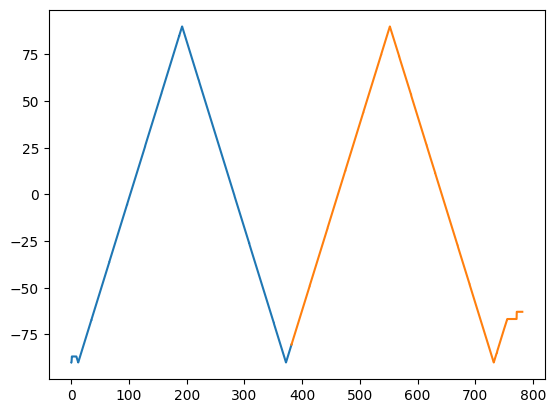

Text(0.5, 0, 'time [minutes]')

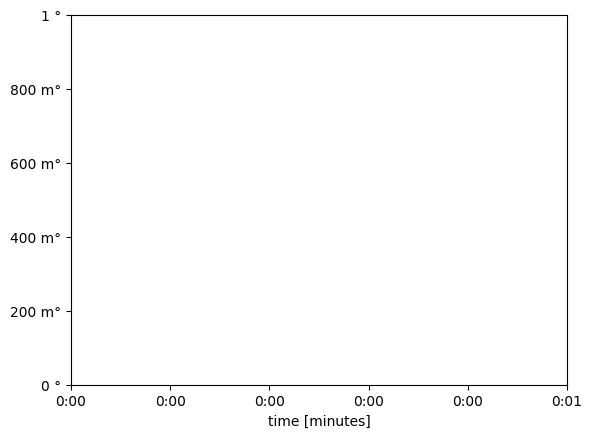

In [11]:
t0 = 0
for part in range(2):
    angle = pickle.load(open(folder+f'schwenks_{part:02d}_angle.pkl','rb'))
    timestamp = pickle.load(open(folder+f'schwenks_{part:02d}_timestamps.pkl','rb'))
    if part==0:
        t0 = timestamp[0]
    plt.plot([(t-t0) for t in timestamp], [a*180/pi - 90 for a in angle])
plt.show()
plt.gca().yaxis.set_major_formatter(EngFormatter('°'))
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x,pos:f'{int(x/60)}:{int(x%60):02d}'))
plt.xlabel('time [minutes]')
